In [1]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089 (from 1)
Receiving objects: 100% (2095/2095), 15.07 MiB | 34.91 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = './Sign-Language-Digits-Dataset/Dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1862 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [3]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False, input_shape=(100,100,3), weights='imagenet')

print(base_model.output.shape)
print(base_model.count_params())


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(None, 3, 3, 512)
14714688


In [4]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [5]:
from tensorflow.keras.optimizers import SGD

model.compile(
    optimizer=SGD(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.0916 - loss: 2.3150 - val_accuracy: 0.1500 - val_loss: 2.2738
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.1319 - loss: 2.2896 - val_accuracy: 0.1850 - val_loss: 2.2637
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.1817 - loss: 2.2554 - val_accuracy: 0.2000 - val_loss: 2.2532
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.2381 - loss: 2.2271 - val_accuracy: 0.1950 - val_loss: 2.2414
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.3058 - loss: 2.1873 - val_accuracy: 0.2300 - val_loss: 2.2278
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.3649 - loss: 2.1371 - val_accuracy: 0.2550 - val_loss: 2.2101
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.4070 - loss: 2.0879 - val_accuracy: 0.2650 - val_loss: 2.1890
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.5017 - loss: 2.0242 - val_accuracy: 0.2550 - val

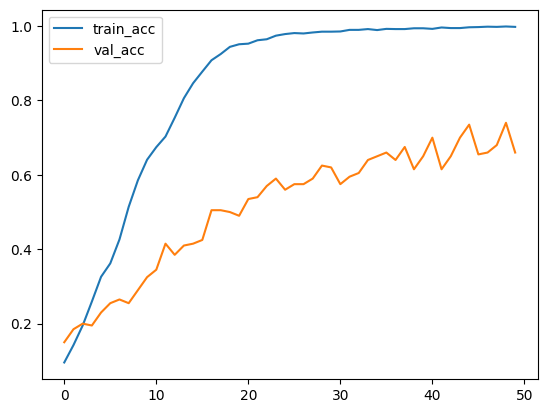

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [7]:
model.save('sign_vgg.h5')